Computational feigenbaum constant = 4.698347107438032
Feigenbaum Constant estimated visually: 4.500000000000018


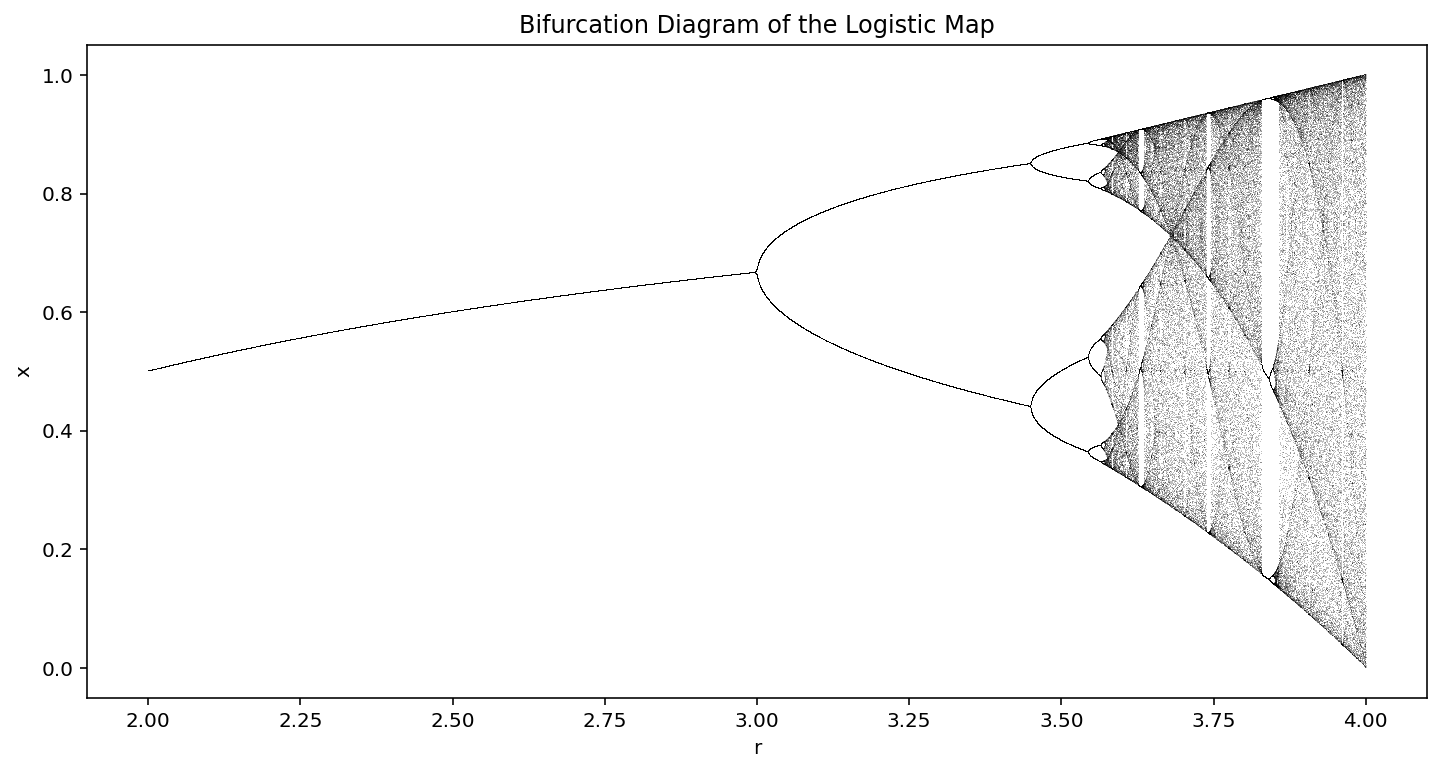

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x_vals = []  # List to store x values
r_vals = []  # List to store r values

# Loop over 10,000 r-values ranging from 2.5 to 4.0
for r in np.linspace(2.0, 4.0, 10000): 
    x = 0.3  # Initial condition (x0)

    # Iterate the logistic map 1000 times for each r value
    # This is to allow the system to settle into its behavior
    for _ in range(1000):
        x = r * x * (1 - x)  # Logistic equation: x_n+1 = r * x_n * (1 - x_n)

    # After the transient phase (first 1000 iterations), 
    # iterate the logistic map an additional 50 times
    # and record the r and x values
    for _ in range(50):
        x = r * x * (1 - x)  # Continue iterating the logistic map
        r_vals.append(r)     # Store the current r value
        x_vals.append(x)     # Store the corresponding x value

# Plotting the bifurcation diagram
plt.figure(figsize=(12, 6))  
plt.plot(r_vals, x_vals, ',k', alpha=0.25)  
plt.title("Bifurcation Diagram of the Logistic Map")  
plt.xlabel("r")  
plt.ylabel("x")  

# Array for the r values
R_list = np.linspace(2.0, 4.0, 10000)


#Function to determine Bifurcation points
def BifurcationPoints(Rthings):
    
    x0 = 0.3
    N = 230 # Number of times we will iterate
    M = 210  # Point after which we consider the system to have settled
    bifurcation_values = []
    previous_count = 0  # To store the number of distinct points for the previous r

    def logis(r):
        #Function designed to apply the logistic map equation to the r values
        x_list = [x0]    
        for i in range(N-1):
            x_list.append(r * x_list[-1] * (1 - x_list[-1]))
        return x_list

    for r in Rthings:
        x_list = logis(r)
        stable_points = x_list[M:] #Stable points are considered to be only the last 20 values iterated over

        # Identify the number of distinct stable points
        distinct_points = set()
        for x in stable_points: 
            found = False
            for point in distinct_points:
                if abs(point - x) < 1e-2:  # Tolerance for considering points as identical
                    found = True
                    break      #Ignore x value  
            if not found:
                distinct_points.add(x) #Adds x to the distinct_points set.

        current_count = len(distinct_points) 
        if current_count != previous_count and previous_count != 0:      #If this condition is true, a bifurcation point has been found.
            bifurcation_values.append(r)                 
        
        previous_count = current_count #Updates the count for the next iteration.



    return bifurcation_values 
      

#Calculation of feigenbaum constant

v = BifurcationPoints(R_list)


bf1 =v[0]
bf2 = v[1] 
bf3 = v[3]

feigenbaum = (bf2-bf1)/(bf3-bf2)
print('Computational feigenbaum constant =',feigenbaum)


#Visual estimate of bifurcation points
bifurcation_points = np.array([3.0,3.45,3.55])

# Calculates the differences in parameter values
delta_r_values = np.diff(bifurcation_points)

# Calculates ratios
ratios = delta_r_values[:-1] / np.abs(delta_r_values[1:]) 

# Calculates the Feigenbaum constant as the limit of ratios
feigenbaum_constant = np.mean(ratios)

print("Feigenbaum Constant estimated visually:", feigenbaum_constant)

In [4]:
### statement of contribution ####

#Tom - Bifurcation Point Code
#Toby - Bifurcation Point Theory
#Vaughn - Logistic Map plot